In [1]:
import pandas as pd
import numpy as np # mathematical functions
import matplotlib.pyplot as plt
import seaborn as sns# data visualization library
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
#loading DataFrame
df=pd.read_csv("dat.csv")

In [3]:
#inspecting the shape of data
df.shape

(3616, 7)

In [4]:
#showing first 5 rows
df.head()

,Longitude,Latitude,Elevation,Altitude,Clutter_height,Distance,Path_Loss
0,3.163405,6.675160,51,55,6,61,129
1,3.163405,6.675160,51,55,6,61,132
2,3.163405,6.675169,51,55,6,61,132
3,3.163405,6.675169,51,55,6,61,134
4,3.163405,6.675178,51,55,6,61,134


In [5]:
#showing last 5 rows
df.tail()

,Longitude,Latitude,Elevation,Altitude,Clutter_height,Distance,Path_Loss
3611,3.156015,6.667575,47,55,6,1129,151
3612,3.156024,6.667575,47,55,6,1128,151
3613,3.156033,6.667575,47,55,6,1128,147
3614,3.156033,6.667566,47,55,6,1128,147
3615,3.156042,6.667566,47,55,6,1128,153


In [6]:
#getting the column names
df.columns

Index(['Longitude', 'Latitude', 'Elevation', 'Altitude', 'Clutter_height',
       'Distance', 'Path_Loss'],
      dtype='object')

In [7]:
#information on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Longitude       3616 non-null   float64
 1   Latitude        3616 non-null   float64
 2   Elevation       3616 non-null   int64  
 3   Altitude        3616 non-null   int64  
 4   Clutter_height  3616 non-null   int64  
 5   Distance        3616 non-null   int64  
 6   Path_Loss       3616 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 197.9 KB


In [8]:
#Counting NaN values under the entire DataFrame:
CountNan = df.isna().sum().sum()
print ('Count of NaN: ' + str(CountNan))

Count of NaN: 0


In [9]:
#defining feature and target variable
X = df[['Longitude', 'Latitude', 'Elevation', 'Altitude', 'Clutter_height', 'Distance']]
y = df['Path_Loss']

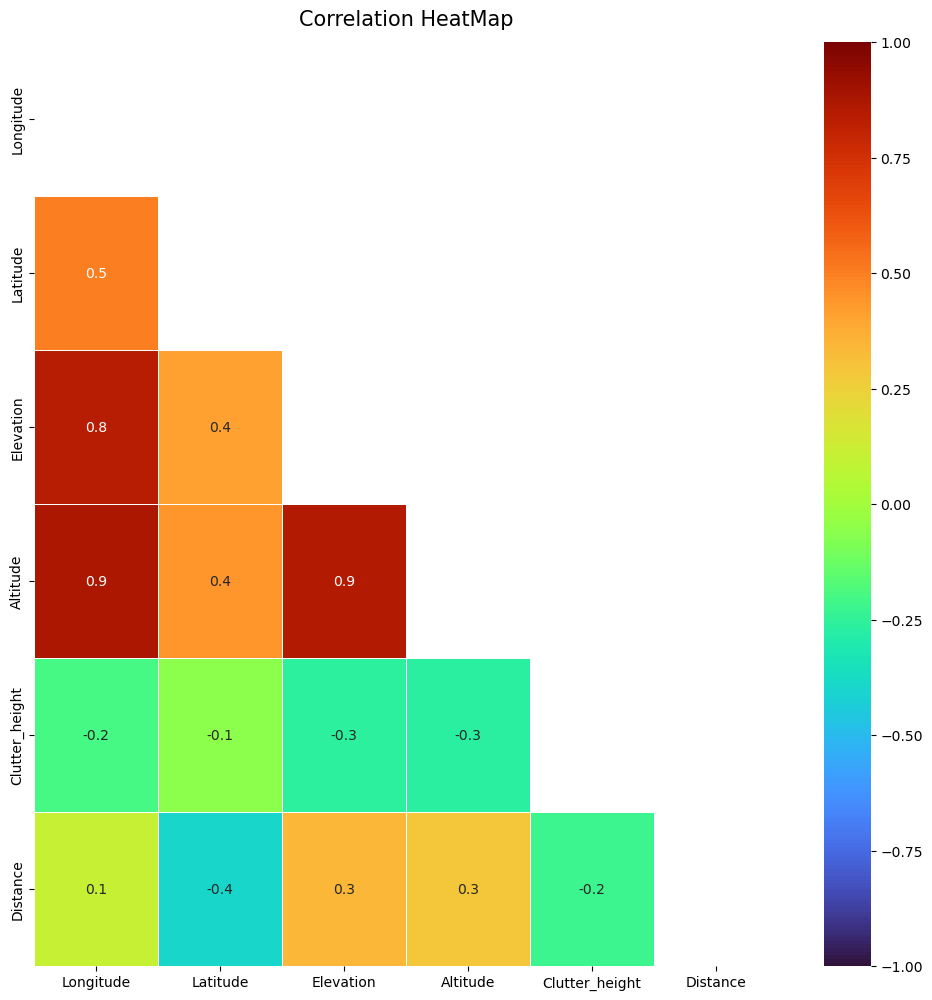

In [10]:
#correlation map
plt.subplots(figsize=(12, 12))
mask = np.triu(X.corr())
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, mask=mask, linewidths=.5, fmt= '.1f', cmap='turbo')
heatmap.set_title('Correlation HeatMap', fontdict={'fontsize':15}, pad=12);

In [11]:
#spilting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [12]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Defining functions for training models
def train_models(X_train,y_train):
    
    #Using Linear Regression
    from sklearn.linear_model import LinearRegression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    
    #Using k-Nearest Neighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    #Using GaussianNaiveBayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    #Standardize the data for MLPRegressor
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Using MLPRegressor (Artificial Neural Network for regression)
    from sklearn.neural_network import MLPRegressor
    ann_reg = MLPRegressor(max_iter=1000, activation='relu', random_state=0)
    ann_reg.fit(X_train_scaled, y_train)
    
    #printing model accuracy on the training data.
    print('[0]Linear Regression Training Accuracy:', 100*linear_reg.score(X_train, y_train))
    print('[1]K-Nearest Neighbors Training Accuracy:', 100*knn.score(X_train, y_train))
    print('[2]Gaussian Naive Bayes Training Accuracy:', 100*gauss.score(X_train, y_train))
    print('[3]Random Forest Classifier Training Accuracy:', 100*forest.score(X_train, y_train))
    print('[4]Artificial Neural Netwoork Training Accuracy:', 100*ann_reg.score(X_train_scaled, y_train))
    
    return linear_reg, knn, gauss, forest, ann_reg

In [13]:
#printing training models
models_list = train_models(X_train,y_train)

[0]Linear Regression Training Accuracy: 30.32659690138719
[1]K-Nearest Neighbors Training Accuracy: 86.73502108231649
[2]Gaussian Naive Bayes Training Accuracy: 6.316274781005071
[3]Random Forest Classifier Training Accuracy: 84.73951129552789
[4]Artificial Neural Netwoork Training Accuracy: 58.17999185796624


In [14]:
from sklearn.metrics import confusion_matrix

for i, individual_model in enumerate(models_list):
    
    # Discretizing continuous predictions
    y_pred_discrete = np.round(individual_model.predict(X_test)).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_discrete)
  
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(f'Model {i} Confusion Matrix:')
    print(cm)
    
    # Checking for zero denominator to avoid division by zero
    denominator = TP + TN + FN + FP
    if denominator != 0:
        accuracy = 100 * (TP + TN) / denominator
        print(f'Model {i} Testing Accuracy: {accuracy:.2f}%')
    else:
        print(f'Model {i} Testing Accuracy is undefined due to division by zero.')
        
    print()  # Print a new line


Model 0 Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model 0 Testing Accuracy is undefined due to division by zero.

Model 1 Confusion Matrix:
[[0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model 1 Testing Accuracy is undefined due to division by zero.

Model 2 Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Model 2 Testing Accuracy: 100.00%

Model 3 Confusion Matrix:
[[1 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]
Model 3 Testing Accuracy: 66.67%

Model 4 Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model 4 Testing Accuracy is undefined due to division by zero.



In [15]:
from sklearn.metrics import classification_report, accuracy_score

for i, individual_model in enumerate(models_list):
    print('Model ', i)
  
    # Discretize continuous predictions
    y_pred_discrete = np.round(individual_model.predict(X_test)).astype(int)

    # Checking precision, recall, f1-score
    print(classification_report(y_test, y_pred_discrete, zero_division=1))
  
    # second check on the model's accuracy on the test data
    accuracy = 100 * accuracy_score(y_test, y_pred_discrete)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, accuracy))
    print()  # Print a new line

Model  0
              precision    recall  f1-score   support

         104       1.00      0.00      0.00         2
         106       1.00      0.00      0.00         3
         110       1.00      0.00      0.00         7
         111       1.00      0.00      0.00         1
         112       1.00      0.00      0.00         5
         113       1.00      0.00      0.00         6
         114       1.00      0.00      0.00         2
         115       1.00      0.00      0.00         2
         116       1.00      0.00      0.00         1
         117       1.00      0.00      0.00         2
         118       1.00      0.00      0.00         2
         119       1.00      0.00      0.00         1
         120       1.00      0.00      0.00         4
         121       1.00      0.00      0.00         2
         123       1.00      0.00      0.00         7
         124       1.00      0.00      0.00         6
         125       1.00      0.00      0.00        13
         126      

In [16]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=1000, activation='relu', random_state=0)

# Fitting for the model
model.fit(X_train, y_train)

# showing the output activation function for the model
output_activation = model.out_activation_
print(f"Output Activation Function: {output_activation}")

Output Activation Function: identity


Model 0:


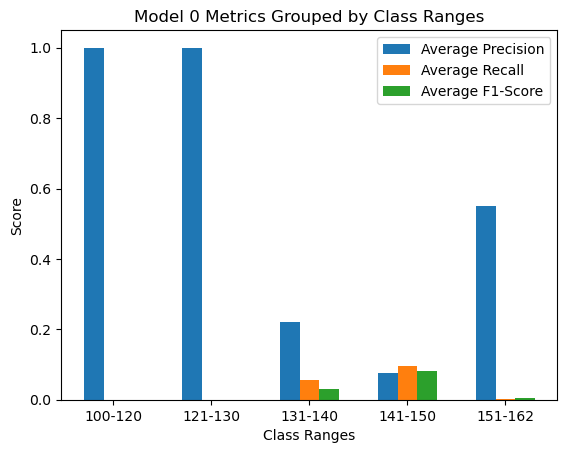

Model 1:


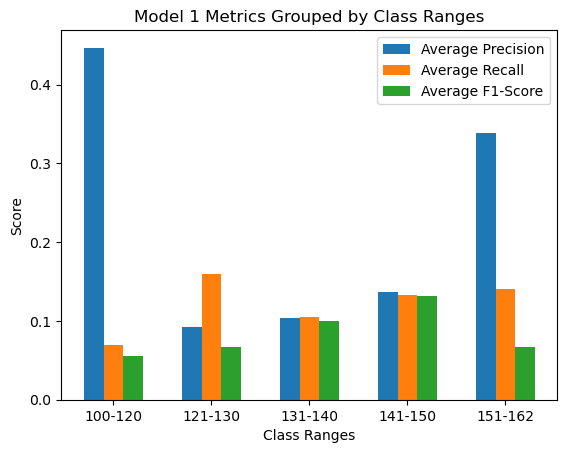

Model 2:


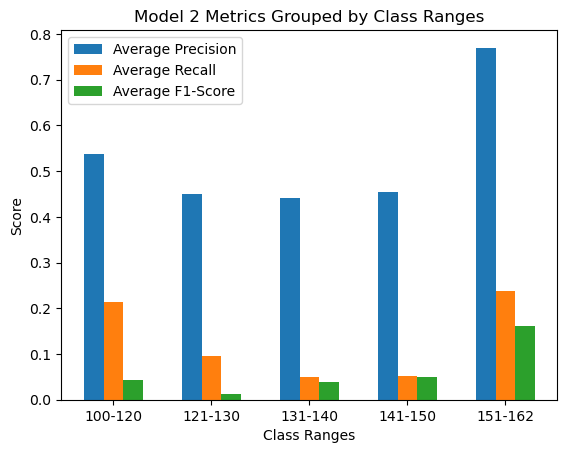

Model 3:


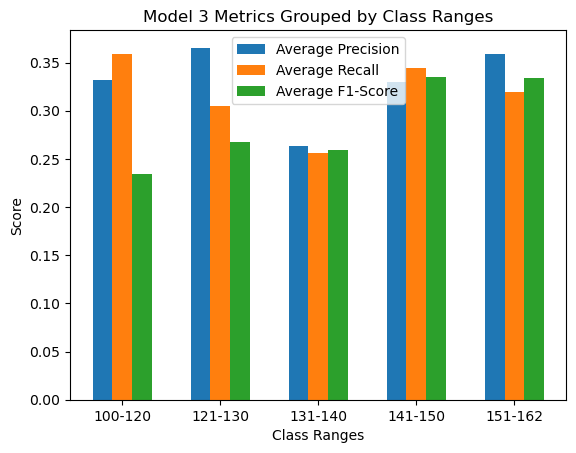

Model 4:


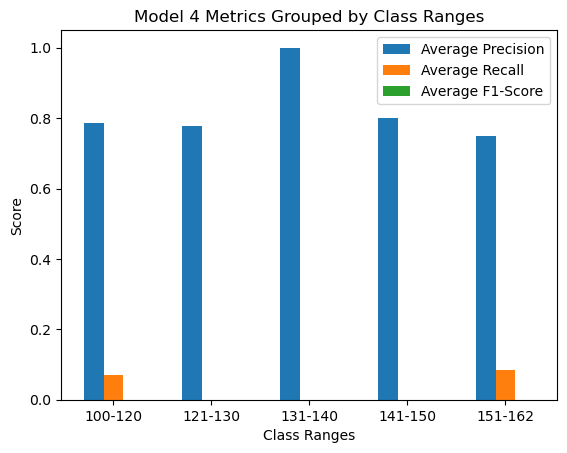

In [24]:
# Defining the ranges for grouping
ranges = [(100, 120), (121, 130), (131, 140), (141, 150), (151, 162)]

for i, individual_model in enumerate(models_list):
    print(f'Model {i}:')

    # Getting predictions
    y_pred = individual_model.predict(X_test)

    # Discretizing continuous predictions
    y_pred_discrete = np.round(y_pred).astype(int)

    # Discretizing continuous true labels
    y_test_discrete = np.round(y_test).astype(int)

    # Calculating metrics
    class_report = classification_report(y_test_discrete, y_pred_discrete, zero_division=1, output_dict=True)

    # Extract metrics and labels
    labels = list(class_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

    precision = [class_report[label]['precision'] if isinstance(class_report[label], dict) else class_report[label] for label in labels]
    recall = [class_report[label]['recall'] if isinstance(class_report[label], dict) else class_report[label] for label in labels]
    f1 = [class_report[label]['f1-score'] if isinstance(class_report[label], dict) else class_report[label] for label in labels]

    # Group metrics based on defined ranges
    grouped_precision = []
    grouped_recall = []
    grouped_f1 = []

    for r in ranges:
        indices = [j for j, label in enumerate(labels) if label.isnumeric() and r[0] <= int(label) <= r[1]]
        if indices:
            grouped_precision.append(np.mean([precision[j] for j in indices]))
            grouped_recall.append(np.mean([recall[j] for j in indices]))
            grouped_f1.append(np.mean([f1[j] for j in indices]))
        else:
            grouped_precision.append(0)
            grouped_recall.append(0)
            grouped_f1.append(0)

    # Plotting
    width = 0.2
    x = np.arange(len(ranges))

    plt.bar(x - width, grouped_precision, width, label='Average Precision')
    plt.bar(x, grouped_recall, width, label='Average Recall')
    plt.bar(x + width, grouped_f1, width, label='Average F1-Score')

    plt.xlabel('Class Ranges')
    plt.ylabel('Score')
    plt.title(f'Model {i} Metrics Grouped by Class Ranges')
    plt.xticks(x, [f"{r[0]}-{r[1]}" for r in ranges])  # Setting x-axis ticks explicitly
    plt.legend()

    plt.show()

Model 0:


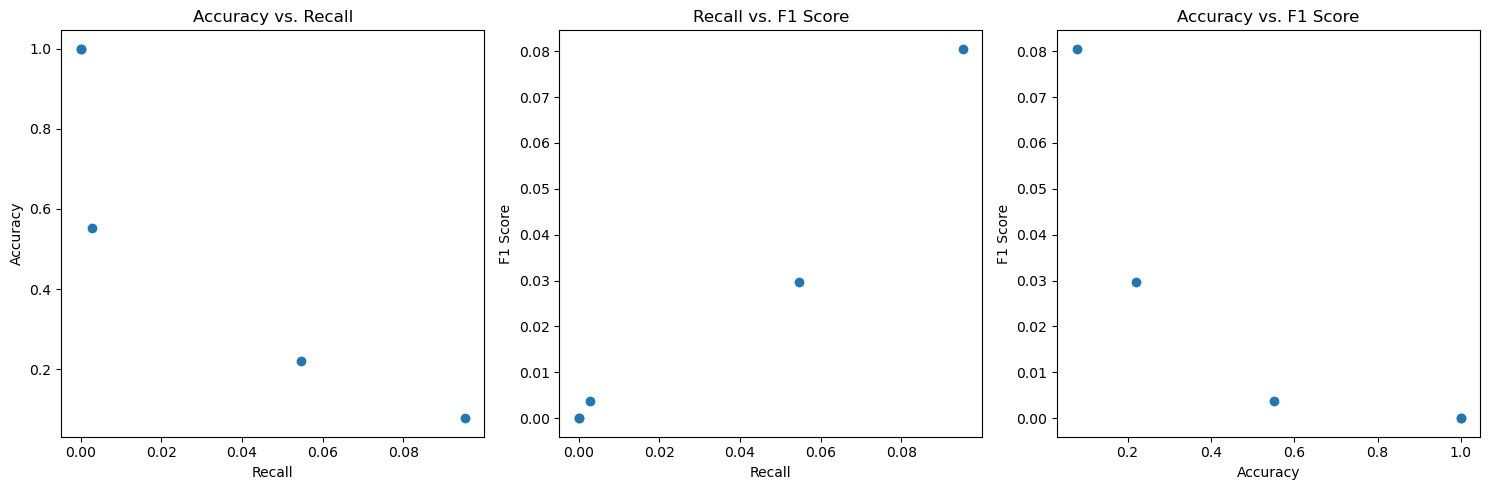

Model 1:


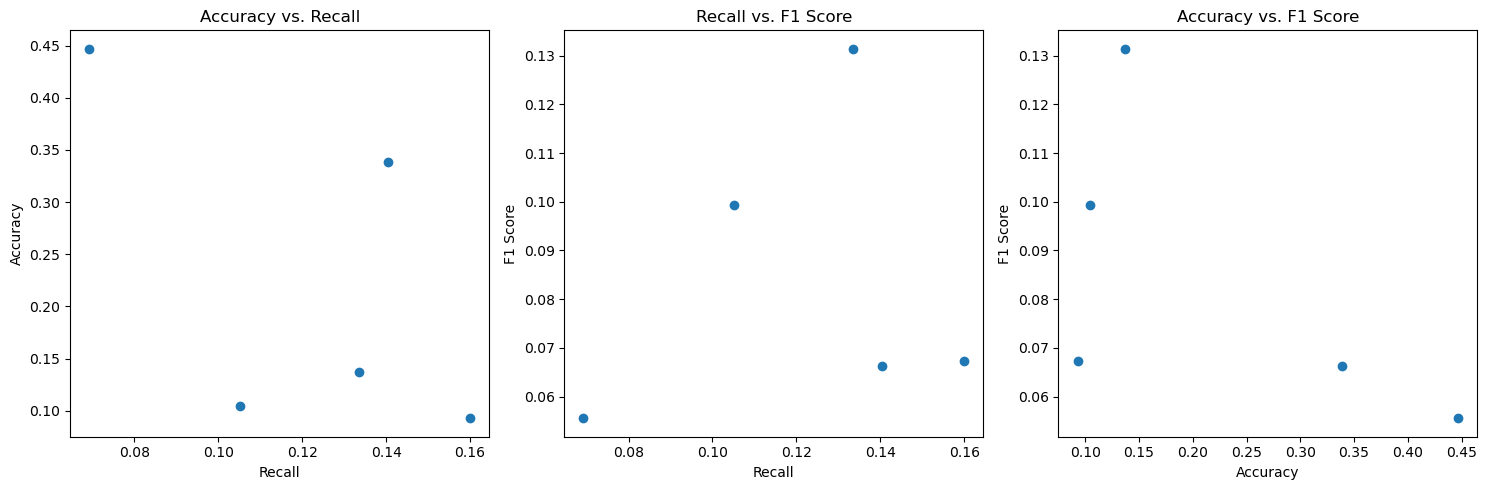

Model 2:


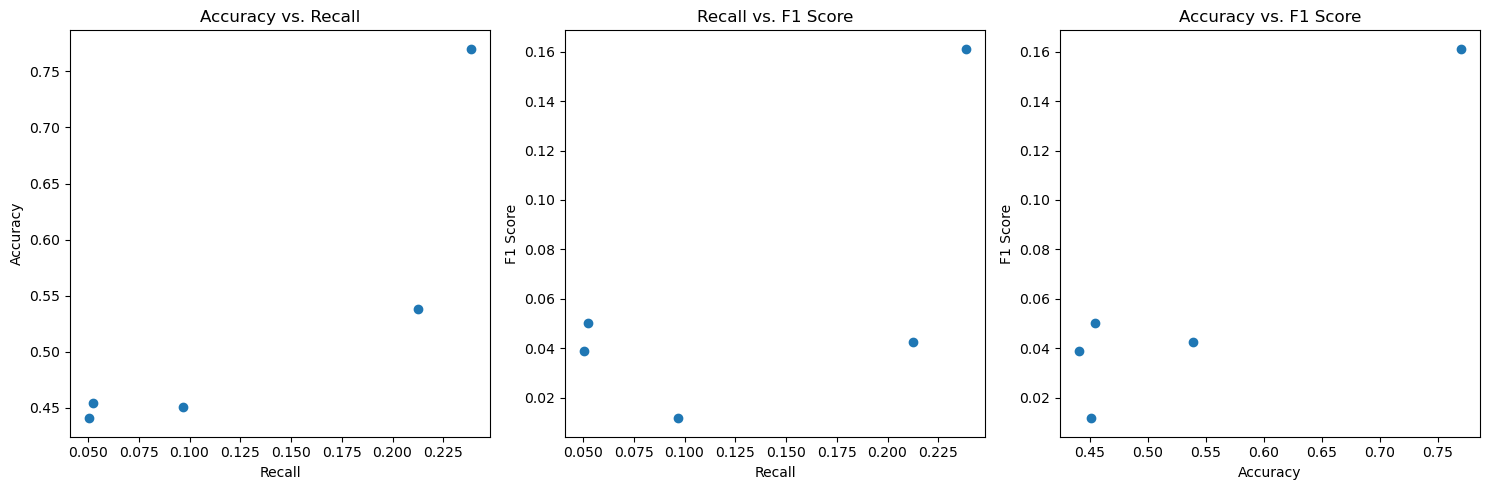

Model 3:


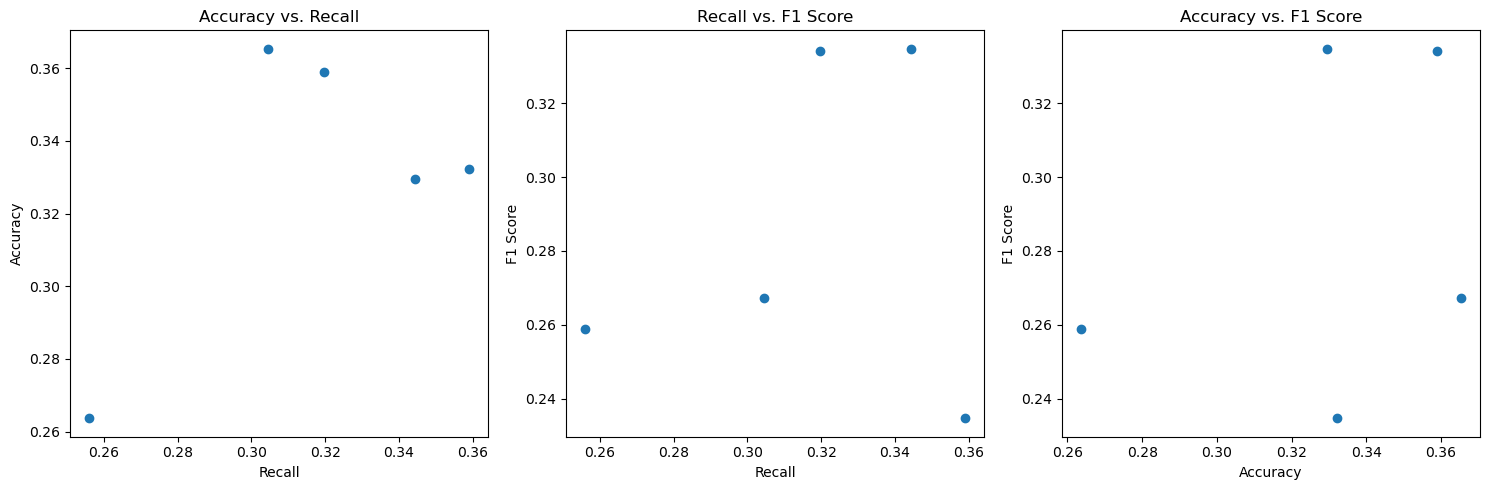

Model 4:


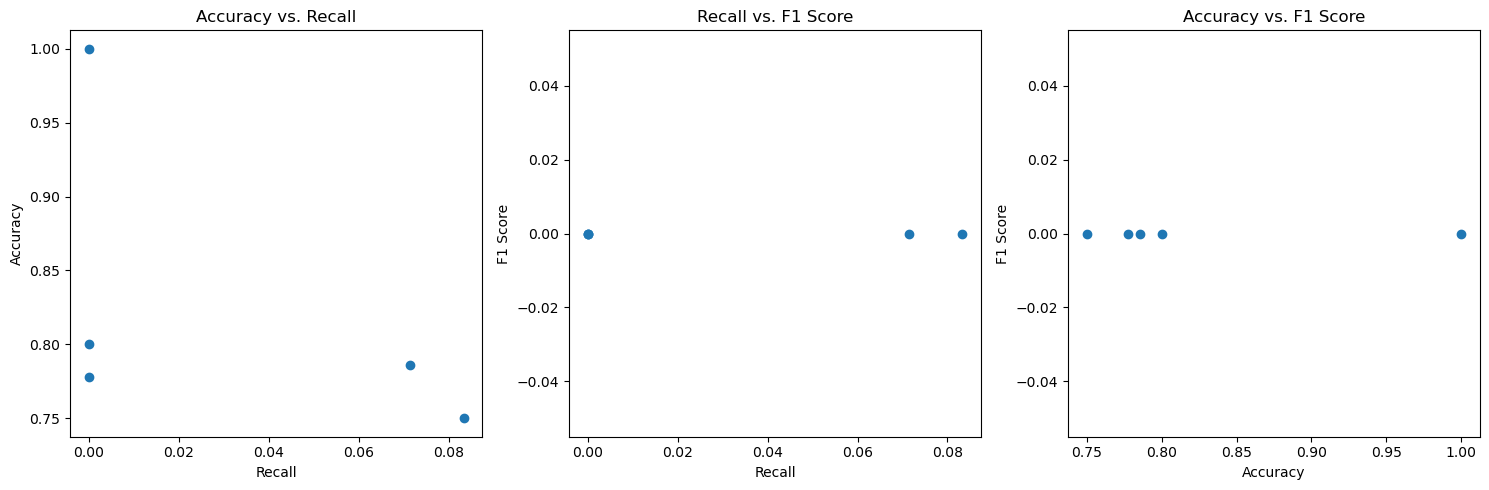

In [26]:
# Defining the ranges for grouping
ranges = [(100, 120), (121, 130), (131, 140), (141, 150), (151, 162)]

for i, individual_model in enumerate(models_list):
    print(f'Model {i}:')

    # Getting predictions
    y_pred = individual_model.predict(X_test)

    # Discretizing continuous predictions
    y_pred_discrete = np.round(y_pred).astype(int)

    # Discretizing continuous true labels
    y_test_discrete = np.round(y_test).astype(int)

    # Calculating metrics
    class_report = classification_report(y_test_discrete, y_pred_discrete, zero_division=1, output_dict=True)

    # Extract metrics and labels
    labels = list(class_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

    precision = [class_report[label]['precision'] if isinstance(class_report[label], dict) else class_report[label] for label in labels]
    recall = [class_report[label]['recall'] if isinstance(class_report[label], dict) else class_report[label] for label in labels]
    f1 = [class_report[label]['f1-score'] if isinstance(class_report[label], dict) else class_report[label] for label in labels]

    # Group metrics based on defined ranges
    grouped_precision = []
    grouped_recall = []
    grouped_f1 = []

    for r in ranges:
        indices = [j for j, label in enumerate(labels) if label.isnumeric() and r[0] <= int(label) <= r[1]]
        if indices:
            grouped_precision.append(np.mean([precision[j] for j in indices]))
            grouped_recall.append(np.mean([recall[j] for j in indices]))
            grouped_f1.append(np.mean([f1[j] for j in indices]))
        else:
            grouped_precision.append(0)
            grouped_recall.append(0)
            grouped_f1.append(0)

    # Plotting    
    width = 0.2
    x = np.arange(len(ranges))

    # Plot accuracy vs. recall
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.scatter(grouped_recall, grouped_precision)
    plt.title('Accuracy vs. Recall')
    plt.xlabel('Recall')
    plt.ylabel('Accuracy')

    # Plot recall vs. F1 score
    plt.subplot(1, 3, 2)
    plt.scatter(grouped_recall, grouped_f1)
    plt.title('Recall vs. F1 Score')
    plt.xlabel('Recall')
    plt.ylabel('F1 Score')

    # Plot accuracy vs. F1 score
    plt.subplot(1, 3, 3)
    plt.scatter(grouped_precision, grouped_f1)
    plt.title('Accuracy vs. F1 Score')
    plt.xlabel('Accuracy')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.show()